In [1]:
import pandas as pd
import seaborn as sns
import os,glob
import warnings
from matplotlib import rcParams
warnings.filterwarnings("ignore")

In [2]:
%load_ext rpy2.ipython

# Multiplex FISH----Data Analysis

In [8]:
%%R
library(Seurat)
library(tidyverse)
library(gtools)

In [4]:
%%R

subRNA=readRDS("../subRNA0709.rds")

In [5]:
%%R
sort.genes=c("vGlut2",'vGat','Chat','Fos','Npas1',
            "Gcg",'Tac1','Tac2','Pdyn','Cart','Penk','Npy',
             'Cck','Adcyap','Nts',
             'Pomc',"Lper",'Htr3a','Drd1','Dbh',"vGlut3",'Calb1',
             "Calcr",'Th')

sort.genes

 [1] "vGlut2" "vGat"   "Chat"   "Fos"    "Npas1"  "Gcg"    "Tac1"   "Tac2"  
 [9] "Pdyn"   "Cart"   "Penk"   "Npy"    "Cck"    "Adcyap" "Nts"    "Pomc"  
[17] "Lper"   "Htr3a"  "Drd1"   "Dbh"    "vGlut3" "Calb1"  "Calcr"  "Th"    


In [6]:
%%R
length(sort.genes)

[1] 24


In [7]:
%%R -w 330 -h 300
for (i in seq(1,length(sort.genes))){
    gene=sort.genes[i]
    print(gene)
    p=FeaturePlot(subRNA, features = gene,label=F,reduction='tsne',keep.scale='feature')
    Name=paste0(gene,".featureplot.tsne.non-log.jpg")
    ggsave(Name)
       
}

[1] "vGlut2"
Saving 4.58 x 4.17 in image
[1] "vGat"
Saving 4.58 x 4.17 in image
[1] "Chat"
Saving 4.58 x 4.17 in image
[1] "Fos"
Saving 4.58 x 4.17 in image
[1] "Npas1"
Saving 4.58 x 4.17 in image
[1] "Gcg"
Saving 4.58 x 4.17 in image
[1] "Tac1"
Saving 4.58 x 4.17 in image
[1] "Tac2"
Saving 4.58 x 4.17 in image
[1] "Pdyn"
Saving 4.58 x 4.17 in image
[1] "Cart"
Saving 4.58 x 4.17 in image
[1] "Penk"
Saving 4.58 x 4.17 in image
[1] "Npy"
Saving 4.58 x 4.17 in image
[1] "Cck"
Saving 4.58 x 4.17 in image
[1] "Adcyap"
Saving 4.58 x 4.17 in image
[1] "Nts"
Saving 4.58 x 4.17 in image
[1] "Pomc"
Saving 4.58 x 4.17 in image
[1] "Lper"
Saving 4.58 x 4.17 in image
[1] "Htr3a"
Saving 4.58 x 4.17 in image
[1] "Drd1"
Saving 4.58 x 4.17 in image
[1] "Dbh"
Saving 4.58 x 4.17 in image
[1] "vGlut3"
Saving 4.58 x 4.17 in image
[1] "Calb1"
Saving 4.58 x 4.17 in image
[1] "Calcr"
Saving 4.58 x 4.17 in image
[1] "Th"
Saving 4.58 x 4.17 in image


In [9]:
%%R

plot.genes1=c("vGlut2",'vGat','Chat',
            "Gcg",'Tac1','Tac2','Pdyn','Cart','Penk','Npy',
             'Cck','Adcyap','Nts',
             'Pomc',"Lper",'Htr3a','Drd1','Dbh',"vGlut3",'Calb1',
             "Calcr",'Th')

plot.genes1

 [1] "vGlut2" "vGat"   "Chat"   "Gcg"    "Tac1"   "Tac2"   "Pdyn"   "Cart"  
 [9] "Penk"   "Npy"    "Cck"    "Adcyap" "Nts"    "Pomc"   "Lper"   "Htr3a" 
[17] "Drd1"   "Dbh"    "vGlut3" "Calb1"  "Calcr"  "Th"    


去掉'vGat','Chat',non-log scale

In [7]:
sortgenes=["vGlut2",'vGat','Chat','Fos','Npas1',
            "Gcg",'Tac1','Tac2','Pdyn','Cart','Penk','Npy',
             'Cck','Adcyap','Nts',
             'Pomc',"Lper",'Htr3a','Drd1','Dbh',"vGlut3",'Calb1',
             "Calcr",'Th']

Saving 16.7 x 8.33 in image


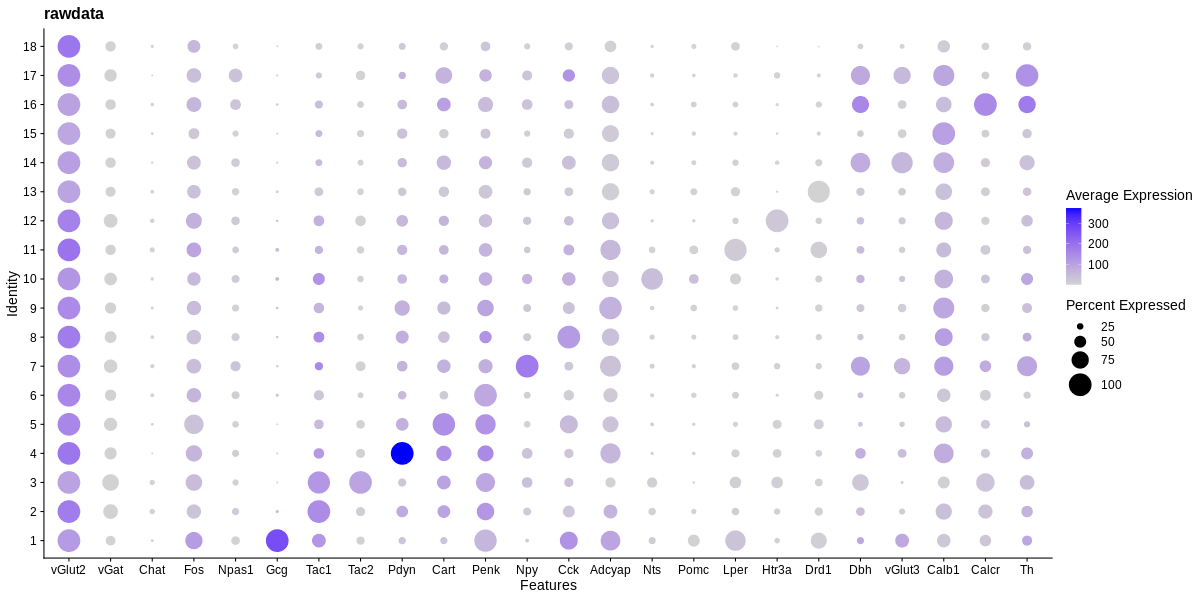

In [8]:
%%R -w 1200 -h 600
p=DotPlot(subRNA, features =  sort.genes,scale=F,dot.scale=10,cols = c("lightgrey", "blue"))+ggtitle("rawdata")
ggsave("EXneuron.dotplot.markers.log.pdf")
p

Saving 16.7 x 8.33 in image


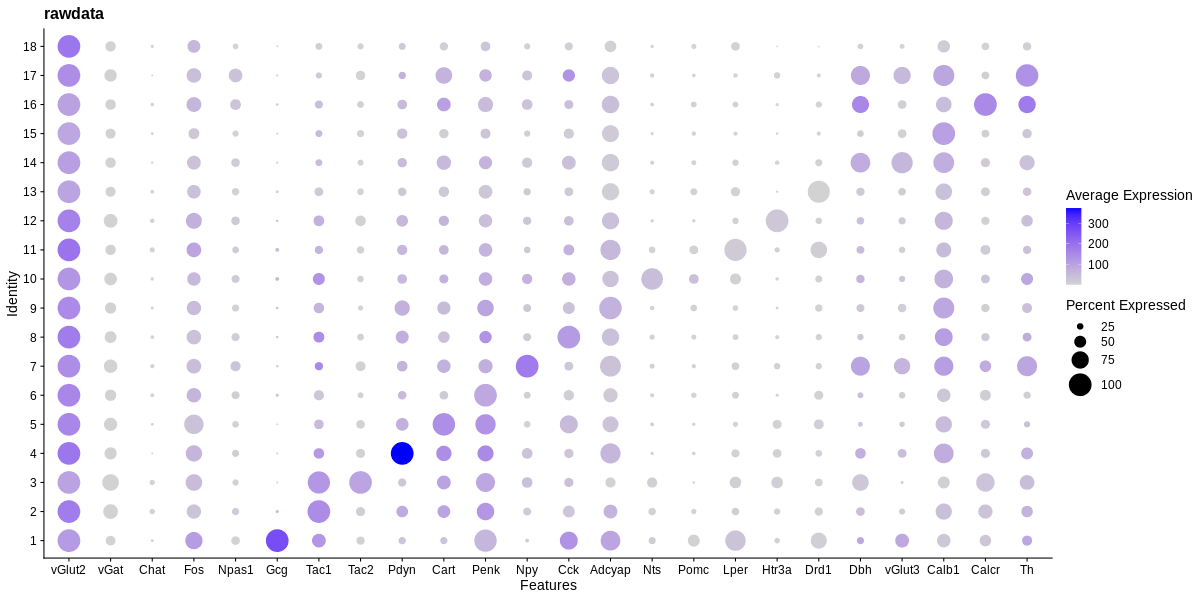

In [31]:
%%R -w 1200 -h 600
p=DotPlot(subRNA, features =  sort.genes,scale=F,dot.scale=10,cols = c("lightgrey", "blue"))+ggtitle("rawdata")
ggsave("EXneuron.dotplot.markers.log.pdf")
p

In [ ]:
%%R
subRNA2=NormalizeData(subRNA)


Saving 16.7 x 8.33 in image


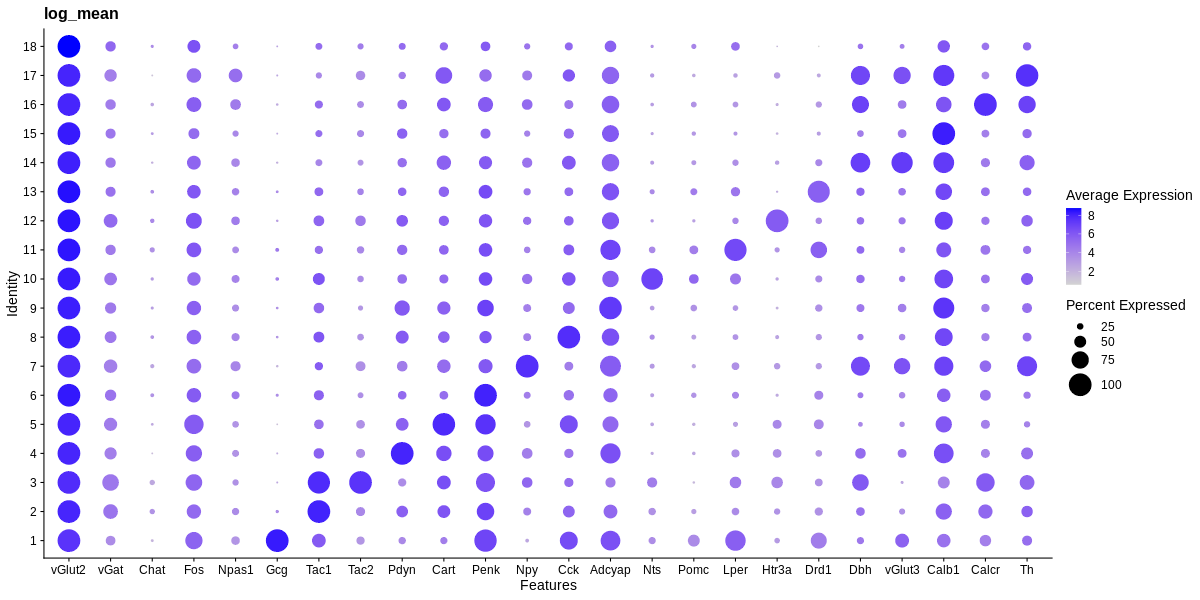

In [27]:
%%R -w 1200 -h 600
p=DotPlot(subRNA2, features =  sort.genes,scale=F,dot.scale=10,cols = c("lightgrey", "blue"))+ggtitle("log_mean")
ggsave("EXneuron.dotplot.markers.log.pdf")
p

In [9]:
%%R
sort.genes2=c("Gcg",'Tac1','Tac2','Pdyn','Cart','Penk','Npy',
             'Cck','Adcyap','Nts',
             'Pomc',"Lper",'Htr3a','Drd1','Dbh',"vGlut3",'Calb1',
             "Calcr",'Th')

sort.genes2

 [1] "Gcg"    "Tac1"   "Tac2"   "Pdyn"   "Cart"   "Penk"   "Npy"    "Cck"   
 [9] "Adcyap" "Nts"    "Pomc"   "Lper"   "Htr3a"  "Drd1"   "Dbh"    "vGlut3"
[17] "Calb1"  "Calcr"  "Th"    


Saving 11.1 x 6.94 in image


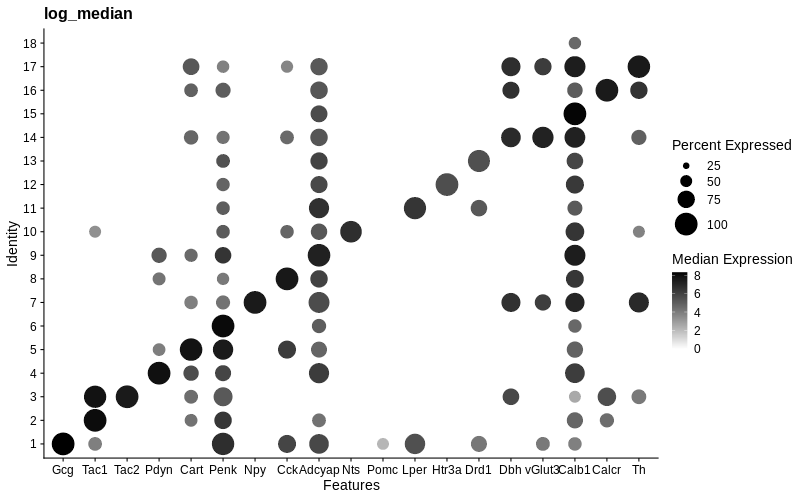

In [26]:
%%R -w 800 -h 500
p=DotPlot2(subRNA2, features =  sort.genes2,scale=F,dot.scale=10,col.min=-2.5 ,col.max = 2.5,
           cols = c("white", "black"))+ggtitle("log_median")
ggsave("EXneuron.dotplot.markers.log_median.pdf")
p

Saving 11.1 x 6.94 in image


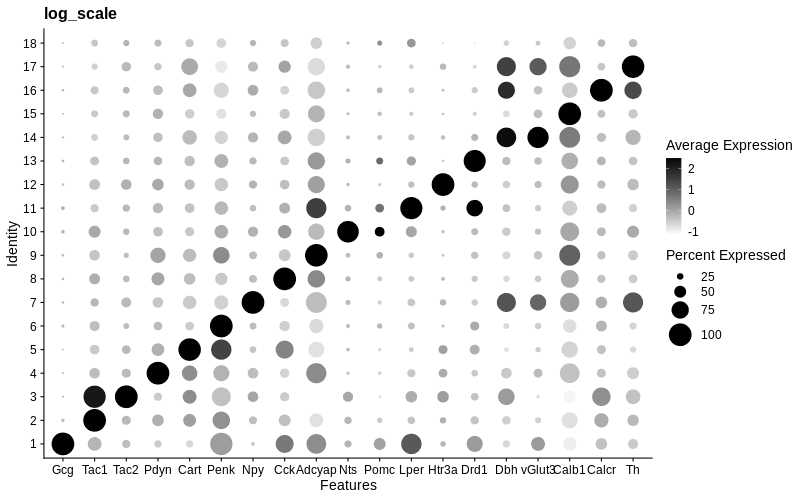

In [25]:
%%R -w 800 -h 500
p=DotPlot(subRNA2, features =  sort.genes2,scale=T,dot.scale=10,col.min=-2.5 ,col.max = 2.5,
          cols = c("white", "black"))+ggtitle("log_scale")
ggsave("EXneuron.dotplot.markers.log_scale.pdf")
p

Saving 11.1 x 6.94 in image


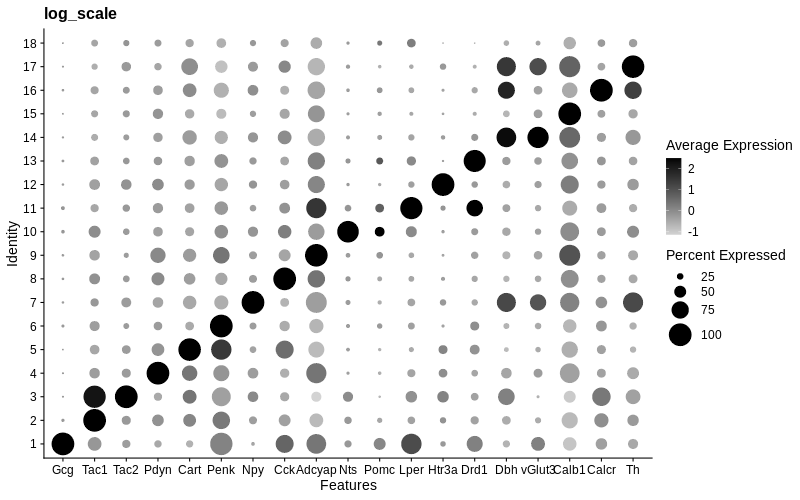

In [33]:
%%R -w 800 -h 500
p=DotPlot(subRNA2, features =  sort.genes2,scale=T,dot.scale=10,col.min=-2.5 ,col.max = 2.5,
          cols = c("lightgrey", "black"))+ggtitle("log_scale")
ggsave("EXneuron.dotplot.markers.log_scale.pdf")
p

### 9) Export gene-cell matrix with extra info:

In [180]:
%%R
out=t(as.data.frame(GetAssayData(subRNA,slot='count')))
out=cbind(subRNA@meta.data[rownames(out),c("new_seurat_clusters","Cell.Position.X",'Cell.Position.Y','Tag')],out)

write.csv(out,"Excitatory.matrix.csv",quote=F)



http://bioinfo.cibr.ac.cn/download/CIBR-BL-RNAScope-20230615/Excitatory.matrix.csv
